**כל הזכויות שמורות לי - דר׳ אלכסנדרה ליטינסקי סימנובסקי אין לעתיק ולהשתמש בחומר ללא רשות**

# **Lab #3 - EDA - Exploration Data Analises**


# **Understanding the Titanic Survival**

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" /> 

Wellcome to the Titanic, the largest British ship at the time,  that sank in the North Atlantic Ocean in the early hours of 15 April 1912.  

In this notebook we will try to undestand the characteristics of the individuals that were at the Titanic, how many survived and who survived.

This dataset is a partial dataset used as the training set on Kaggle's Titanic challenge.
 https://www.kaggle.com/c/titanic/data

#### **Columns**
 
Those the descriptions of the variables in this dataset:

<table>
    <tr><th> PassengerId </th><td> type should be integers </td></tr>
    <tr><th> Survived </th><td> Survived or Not </td></tr>
    <tr><th> Pclass </th><td> Class of Travel </td></tr>
    <tr><th> Name </th><td> Name of Passenger </td></tr>
    <tr><th> Sex </th><td> Gender </td></tr>
    <tr><th> Age </th><td> </td></tr>
    <tr><th> SibSp </th><td> Number of Sibling/Spouse abord </td></tr>
    <tr><th> Parch </th><td> Number of Parent/Child abord </td></tr>
    <tr><th> Ticket </th><td> </td></tr>
    <tr><th> Fare </th><td> </td></tr>
    <tr><th> Cabin </th><td> </td></tr>
    <tr><th> Embarked </th><td> The port in which a passenger has embarked. <br> C - Cherbourg, S - Southampton, Q = Queenstown </td></tr>
</table>


In [393]:
# Import all required libraries

# data analysis and wrangling
import numpy as np
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize']= (16,8)

import warnings
warnings.filterwarnings("ignore")

In [394]:
# Load the training and testing data

data_train = pd.read_csv('train.csv') 

data_test = pd.read_csv('test.csv')
# combin the train and test data to one df
combined_data =pd.concat([data_train, data_test])

In [395]:
# data_train head 
# [
#     data_test.shape[0],
# data_train.shape[0],
# combined_data.shape[0]]

data_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [396]:
data_test.head() 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [397]:
plt.style.use('seaborn-whitegrid')


In [398]:
# shape of the data_train
data_train.shape
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [399]:
# shape of the data_test
data_test.shape

(418, 11)

Our response variable is **Survived** indicating who survived the Titanic. We will use four features: Pclass, Sex, Age and Fare.

Pclass is the Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

For more information, please refer to https://www.kaggle.com/c/titanic/data

In [400]:
# colum in data_train values
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [401]:
# colum in data_test values

data_test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [402]:
# get the dtype object and category in data_train 
data_train.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [403]:
# get the dtype object and category in data_test

data_test.select_dtypes(include=['int', 'float']).columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## **Pre-processing**

### **Check the missing values in the training and testing dataset**

In [404]:
# summing up the missing values (column-wise) in data_train
data_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [405]:
# summing up the missing values (column-wise) in data_test
t = data_test.isnull().sum().sort_values(ascending=False)
# get the precent of the missing values in data_test
d = pd.DataFrame(t, columns=['Total'])
d['Precent'] = 100 * (d['Total'] / data_test.shape[0])
d

,Total,Precent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [406]:
# len(data_train.PassengerId.unique()) 
# data_train.Survived.sum()

In [407]:
def missing_percentage(df):
    '''
    exlain the function ... 
    Passangers and Survival First, lets check how many passangers are on the Titanic's dataset and how many of them survived?
    '''
    total_null_series = df.isnull().sum().sort_values(ascending=False)
    table_of_total = pd.DataFrame(total_null_series, columns=['Total'])
    table_of_total['Precent'] = round(100 * table_of_total['Total'] / df.shape[0], 2)
    return table_of_total
    

In [408]:
# Passangers and Survival - First, lets check how many passangers are on the Titanic's dataset and how many of them survived?
# train data 
missing_percentage(data_train)

,Total,Precent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [409]:
# Passangers and Survival - First, lets check how many passangers are on the Titanic's dataset and how many of them survived?
# test data 
missing_percentage(data_test)

,Total,Precent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


In [410]:
# get the infomation about the data_train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [411]:
# get the infomation about the data_test
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [412]:
# get the infomation about the type of values in the data_train

data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [413]:
# get the infomation about the type of values in the data_test

data_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [414]:
# Summary statistics of the training data_train
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [415]:
# Summary statistics of the testing data_test

data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##  **Distribution of categorical features**

In [416]:
#  Summary statistics of the training data_train
data_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kelly, Mr. James",male,347082,B96 B98,S
freq,1,577,7,4,644


In [417]:
#  distribution of categorical features in data_test
data_test.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### **Missing values**
 
How many missing values are in the data_train?

In [418]:
# count the the null values in the data_train
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Answer : 

#### **Exploratory Data Analysis**

We'll start by checking out missing data!

We can use seaborn to create a simple heatmap to see where we are missing data!

Text(122.0, 0.5, '')

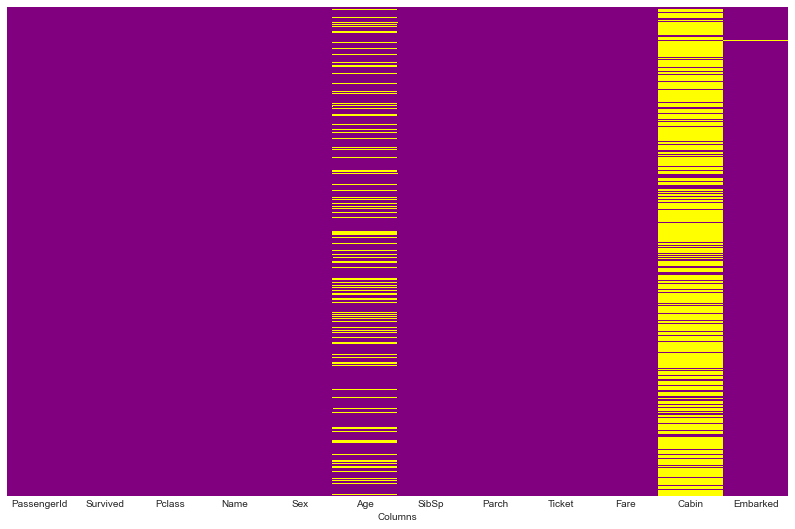

In [419]:
# plot the mising values using seaborn
missing_data_train = data_train.isnull()
plt.figure(figsize=(14,9))
sns.heatmap(missing_data_train, cbar=False, cmap=['purple', 'yellow'], yticklabels=False)
plt.xlabel('Columns')
plt.ylabel('')


Where we have missing values? 

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"



<AxesSubplot:xlabel='Category', ylabel='Count'>

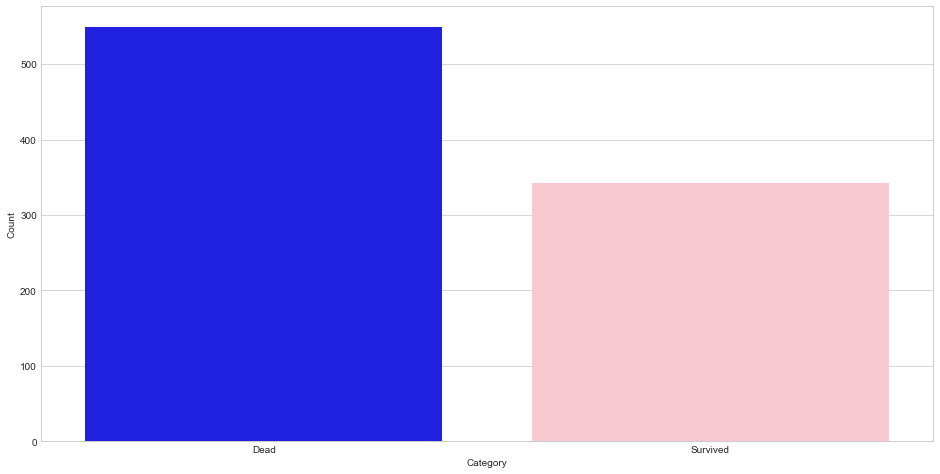

In [420]:
# create the df to aggregate the data_train by the surrvied and dead
df_survvied = pd.DataFrame({
    'Category': ['Dead','Survived', ],
    "Count": [
        len(data_train.PassengerId) - data_train.Survived.sum()
        ,data_train.Survived.sum()
         
    ]
})
sns.barplot(x='Category', y='Count', data=df_survvied, palette=['blue', 'pink'])

### **Gender distribution and survival**

How distributed the survivors by gender?

In [421]:
# create the groupby to aggregate the data_train by the surrvied and dead
data_train.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


In [422]:
# use groupby() and agg() to get the table bellow


Answer: 

<AxesSubplot:xlabel='Survived', ylabel='count'>

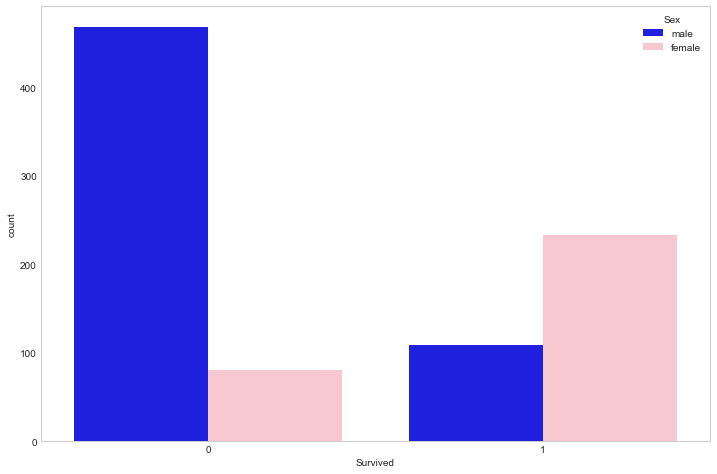

In [423]:
# plot the count of the survived and dead by Sex
plt.figure(figsize=(12,8))
plt.grid()
sns.countplot(x='Survived', hue='Sex', data=data_train, palette=['blue', 'pink'])

## **Survived vs Class**

In [424]:
# create the groupby to aggregate the data_train by the surrvied and dead by the Pclass
g = data_train.groupby('Pclass')['Survived']
# reset the index to get the table bellow
t = g.agg(['mean']).reset_index()
# reset  the column name so that the column name will be the same as the data_train
t['Survived'] = t['mean']
# show only the column that we need
t[['Pclass', 'Survived']]

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [425]:
# correlation (average survived ratio > 0.5) among the group of Pclass=1 and Survived
# using groupby() and sord_values() 



We can see that there is a significant correlation (average survived ratio > 0.5) among `Pclass=1` and `Survived`.

In [426]:
# create the groupby to aggregate the data_train by the surrvied and dead by the Sex
g = data_train.groupby('Sex')['Survived']
# reset the index to get the table bellow
t = g.agg(['mean']).reset_index()
# reset  the column name so that the column name will be the same as the data_train
t['Survived'] = t['mean']
# show only the column that we need
t[['Sex', 'Survived']]

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [427]:
# correlation between Sex and Survived



Who survival more male of female ?? explain 


<AxesSubplot:xlabel='Survived', ylabel='count'>

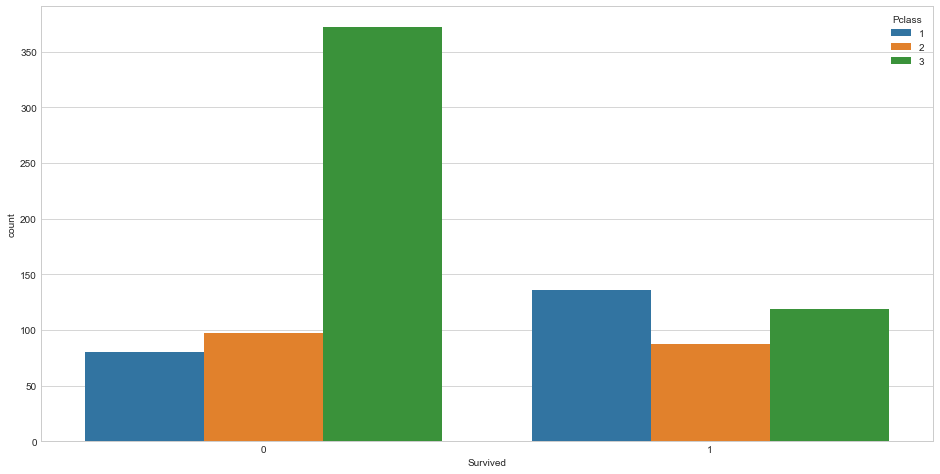

In [428]:
# count the survived and dead by the Pclass
sns.countplot(x='Survived', hue='Pclass', data=data_train)

# **Analyze by visualizing the Titanic data**

## **Correlations between a numeric feature (Age) and our predictive goal (Survived)**

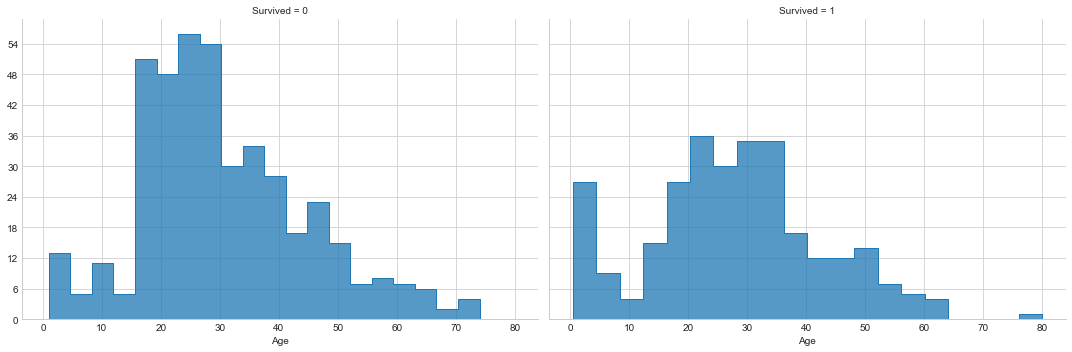

In [429]:
#sns.histplot(data=data_train, x='Age', hue='Survived')


g = sns.FacetGrid(data_train, col="Survived", height=5, aspect=1.5)
g.map(sns.histplot, "Age", element="step", bins=20 )

# Customize the ticks and grid lines
for ax in g.axes.flat:
    ax.grid(True)  # Enable grid lines
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set x-axis ticks to integer values
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set y-axis ticks to integer values

# Display the plots
plt.show()


<AxesSubplot:xlabel='Age', ylabel='Count'>

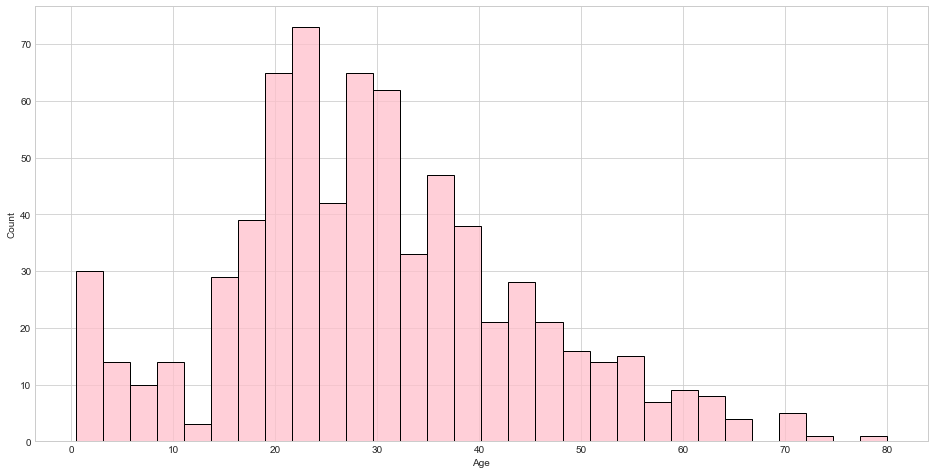

In [430]:
# correlations between a numeric feature (Age) and our predictive goal (Survived)
sns.histplot(data=data_train, x='Age', bins=30, color='pink')

In [431]:
# plot the all surviver not using subplot, number of  bins = 30 ,  without mising value, using seabonr- only one line of code



<AxesSubplot:xlabel='Age', ylabel='Count'>

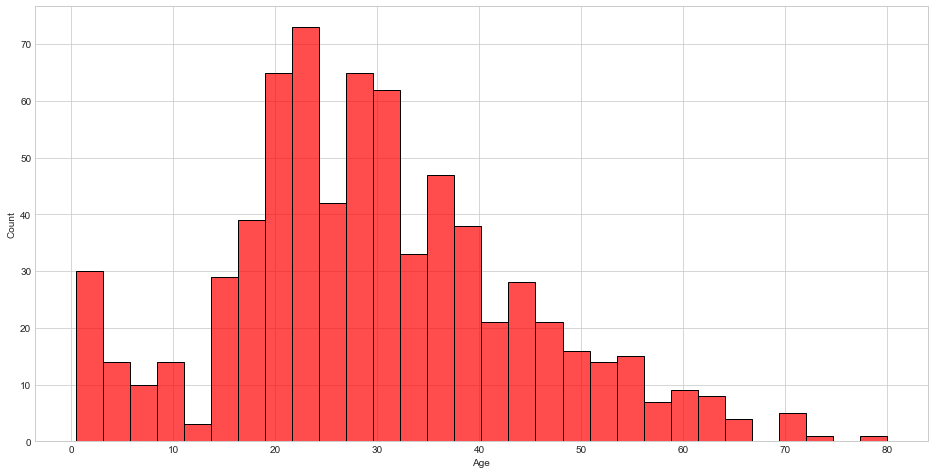

In [432]:

sns.histplot(x='Age', data=data_train,alpha=0.7, bins=30, color='red')



In [433]:
# using hist function with bins =3- and alpha =0.7



## **Combine three features (age, Pclass, and survived) for identifying correlations**

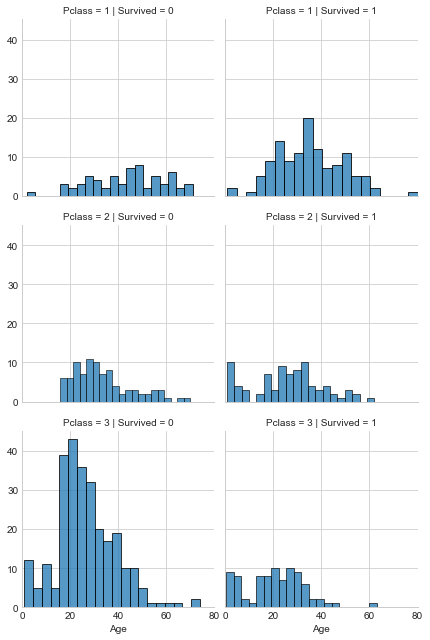

In [434]:
g = sns.FacetGrid(data=data_train, col='Survived', row='Pclass')
g.map(sns.histplot, 'Age', bins=20)
g.set(xlim=(0, 80))

#sns.histplot(x='Age', data=data_train, hue='Pclass', multiple="" ).map

In [435]:
# combine three features (age, Pclass, and survived) for identifying correlations using a single plot



## **Correlations among Embarked, Sex, Fare, and Survived**

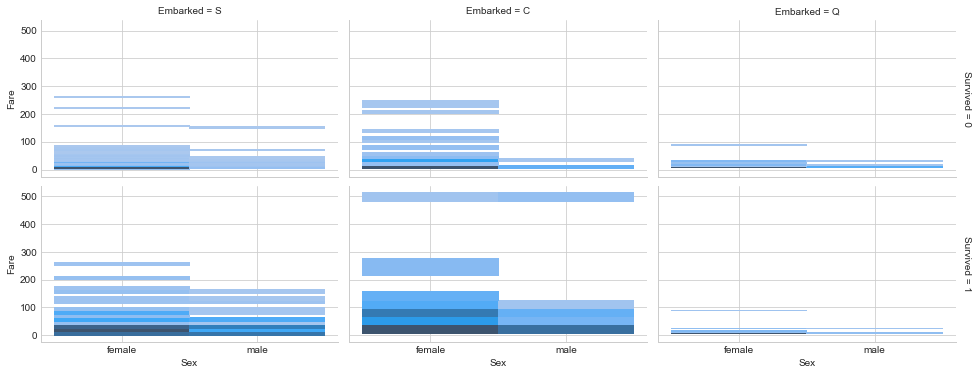

In [436]:
# we are plotting the 
g = sns.FacetGrid(data_train, col="Embarked", row="Survived", margin_titles=True, height=3, aspect=1.5)
g.map_dataframe(sns.histplot, x="Sex", y="Fare")

g.set_axis_labels("Sex", "Fare")
g.set_titles(col_template="Embarked = {col_name}", row_template="Survived = {row_name}")
plt.subplots_adjust(top=0.8)

g.savefig('corr-embarked-sex-fare-survived.png')


In [437]:
# correlations of Embarked, Sex, Fare, and Survived
# make plot not using subplot 
# save plot "corr-embarked-sex-fare-survived.png"






## **Converting `Sex` feature to a new feature called Gender where `female=1`, and `male=0`** 

In [438]:
# converting Sex feature to a new feature called Gender where female=1, and male=0
# on the combined_data


data_train['Gender'] = data_train.Sex.map({'male': 0, 'female': 1})


In [439]:
# see the data_train head  after the convertion of male=0 famle =1
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## **Missing values in the `Cabin` features of training dataset**

In [440]:
train_missing_cabin = data_train.Cabin.isnull().sum()
print(train_missing_cabin)
print(data_test.Cabin.isnull().sum())

687
327


In [441]:
# Null values in the Cabin feature of the combine dataset of training and testing dataset
# troing the number of missing values in the data_train and data_test 


In [442]:
# Null values in the Cabin feature of the training dataset

print(f'The null values in the Cabin feature of the training dataset {train_missing_cabin}')

The null values in the Cabin feature of the training dataset 687


The null values in the Cabin feature of the training dataset : 

## **Rate of duplication for the Ticket feature**

In [443]:
# count the number of duplication the the data_train one line code 


# print the number of the duplication 
#len(data_train.Ticket.unique())

duplication_rate = round(1- len(data_train.Ticket.unique()) / len(data_train.Ticket), 2) 
print(f'Rate of duplication for the Ticket feature : {duplication_rate}')

Rate of duplication for the Ticket feature : 0.24


Rate of duplication for the Ticket feature : 

## **Correlation between the Ticket feature and survival**

In [444]:
ticket_to_freq_series = data_train.groupby('Ticket')['Ticket'].count() #.count().reset_index()

# ticket_to_freq_series.to_dict()
# we are adding the Ticket_frequency feature to the data_train
data_train['Ticket_frequency'] = data_train.Ticket.map(ticket_to_freq_series.to_dict())

data_train.head()

# data_train.join()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Ticket_frequency
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [445]:
# use group by to create  Ticket_frequency col (check the result befor) - be carful!!


In [446]:
d = data_train.groupby('Ticket_frequency')['Survived'].agg('mean')
d.reset_index()

,Ticket_frequency,Survived
0,1,0.297989
1,2,0.574468
2,3,0.698413
3,4,0.500000
4,5,0.000000
5,6,0.000000
6,7,0.238095


In [447]:
# calculate the mean for each Ticket_frequency values


<AxesSubplot:xlabel='Ticket_frequency', ylabel='count'>

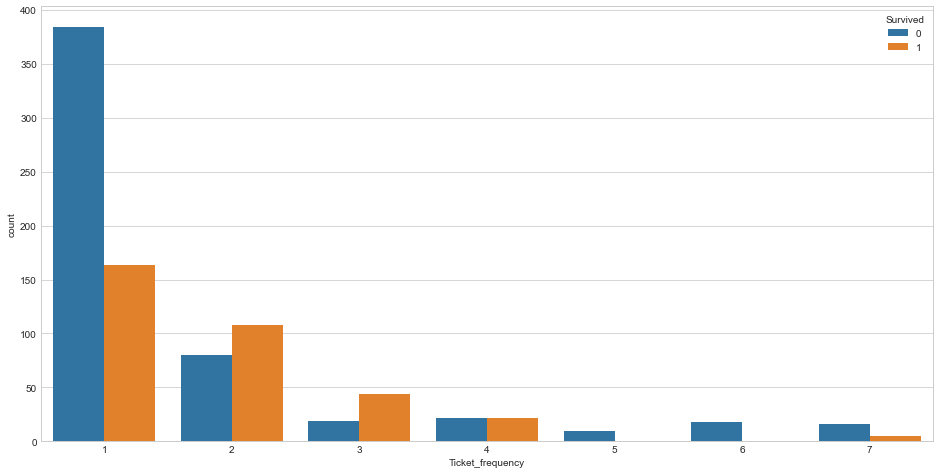

In [448]:
sns.countplot(
    x='Ticket_frequency',
    #y='',
    data=data_train,
    hue='Survived'
)

In [449]:
# plot using seabornd 
#fig, axs = plt.subplots(figsize=(12, 9))




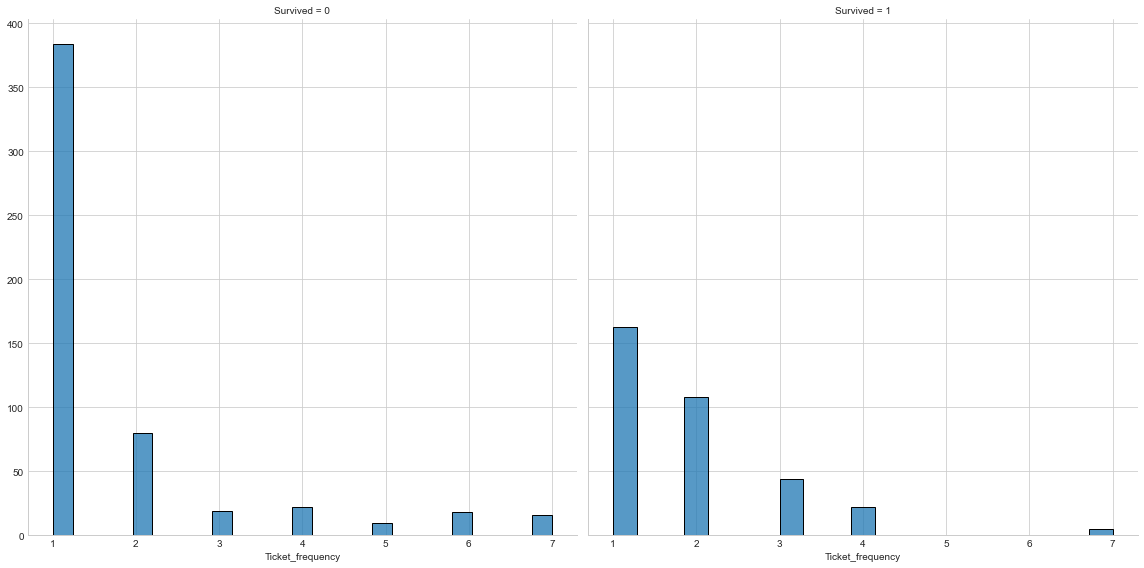

In [450]:
g = sns.FacetGrid(data=data_train, col='Survived', height=8)

g.map(sns.histplot,'Ticket_frequency')

# save the plot
plt.savefig('Ticket_frequency.png')

# for ax in g.axes.flat:
#     ax.set_xticks([1, 2, 3 , 4 , 5 , 6 , 7 ,])
#     ax.set_xticklabels(['1' , '2', '3', '4', '5', '6', '7',])


# data_train[(data_train.Ticket_frequency == 6) & (data_train.Survived == 1) ]

In [451]:
# make a plot using seabon and save it as png 




## **Data Cleaning**
We want to fill in missing age data instead of just dropping the missing age data rows. 

- One way to do this is by filling in the mean age of all the passengers (imputation).
- However we can be smarter about this and check the average age by passenger class. 


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

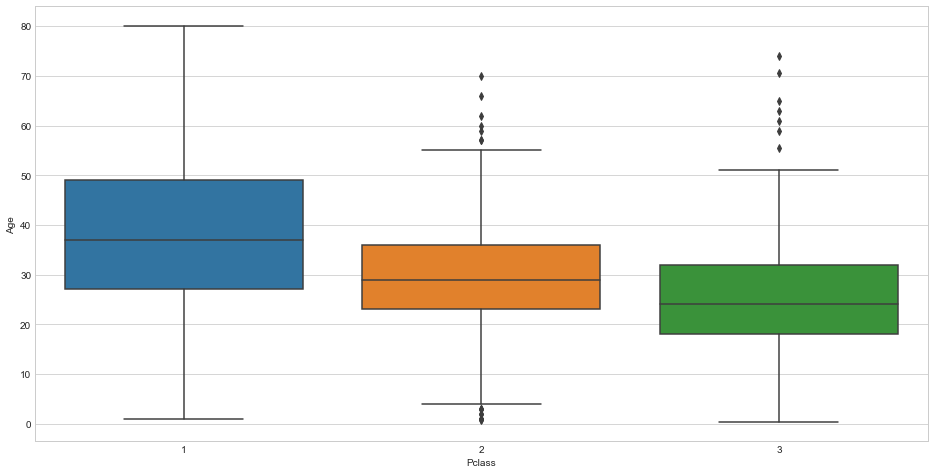

In [452]:
sns.boxplot(data=data_train, x='Pclass', y='Age')

In [453]:
# plot using seaborn 




Conclution 

## **Completing features with missing/null values**

#### **First way:**

## CHECK !

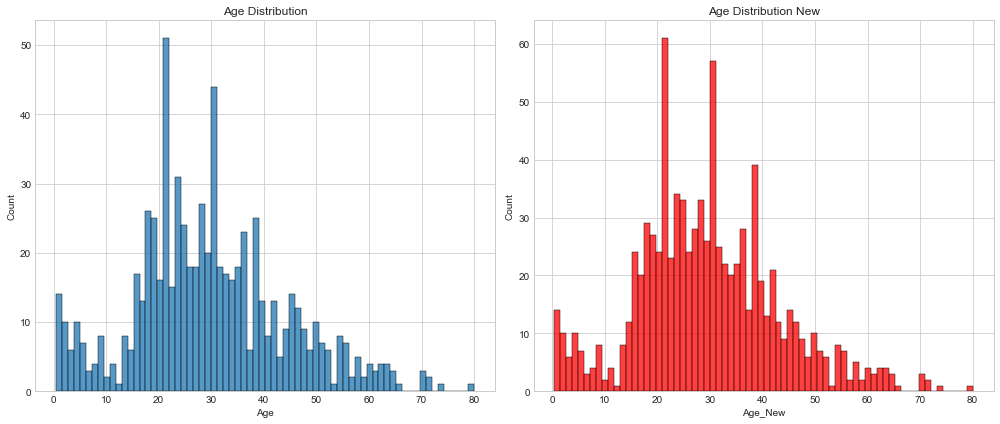

In [454]:

avg_age = data_train['Age'].mean()
std_age = data_train.Age.std()
avg_age, std_age

def generateAge(avg_age, std_age , age):
    if (pd.isna(age)):
        return np.random.randint(avg_age - std_age, avg_age + std_age)
    return age
    
data_train['Age_New'] = data_train.Age.apply(lambda x: generateAge(avg_age, std_age, x))   

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14 , 6), )

# Plot the first plot on the first subplot
sns.histplot(data=data_train, x='Age', ax=axes[0], bins=70)
axes[0].set_title('Age Distribution')
# axes[0].set_xticks(np.arange(int(data_train['Age'].min()), int(data_train['Age'].max()) + 1, 5))

# Plot the second plot on the second subplot
sns.histplot(x='Age_New', data=data_train, ax=axes[1], bins=70, color='red')
axes[1].set_title('Age Distribution New')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

In [455]:
# Filling the misisng/null values for Age feature in the training dataset 



# get average, std, and number of null values in the training data


# generate random numbers between (mean - std) & (mean + std)



# plot original Age values
# NOTE: drop all null values, and convert to int


# fill null values in Age column with random values generated

# convert from float to int
        
# plot new Age Values



In [456]:
# sum the null values 
data_train.Age_New.isna().sum()

0

In [457]:
data_train.Embarked.isnull

<bound method Series.isnull of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

Text(158.0, 0.5, '')

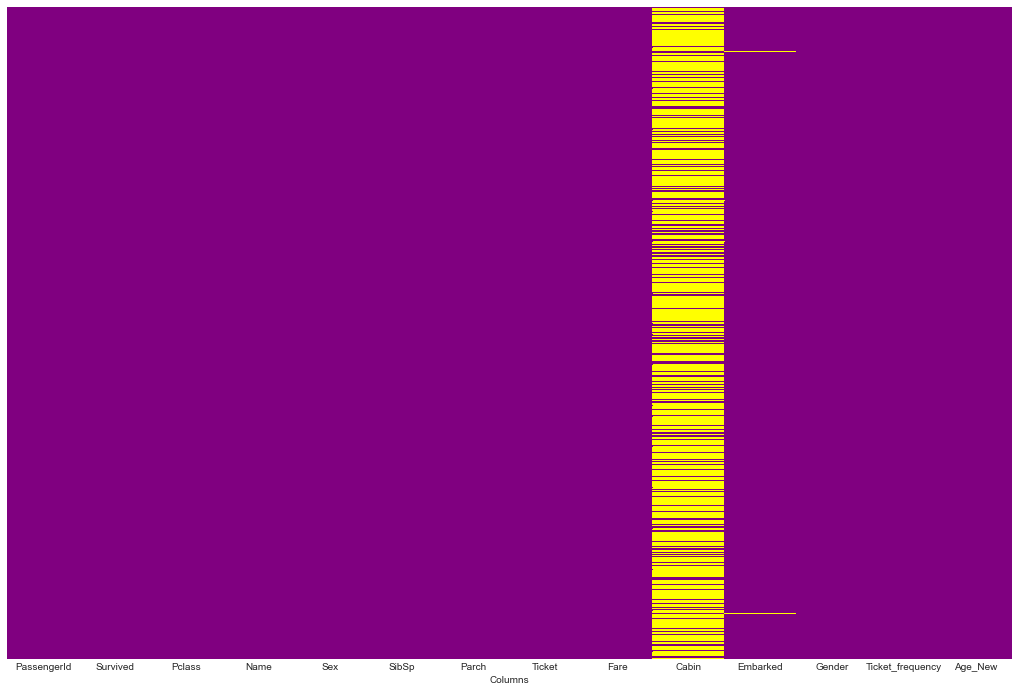

In [458]:
missing_data_train = data_train.isnull()
plt.figure(figsize=(18,12))
sns.heatmap(missing_data_train.drop(columns=['Age',]), cbar=False, cmap=['purple', 'yellow'], yticklabels=False)
plt.xlabel('Columns')
plt.ylabel('')

In [459]:
# plot missing values after imputation 


### **Second way**

In [460]:
# get data_train from combine
data_train_tmp= combined_data

In [461]:
# def  Pclass 1-> 37, Pclass 2 -> 29, else 24, if not nul age 
def impute_age(cols):
    '''Transform P class to age'''
    pclass_to_age = {1: 37, 2: 29, 3: 24}
    if pd.isna(cols['Age']):
        return pclass_to_age[cols['Pclass']]
    return cols['Age']
    # code

Text(158.0, 0.5, '')

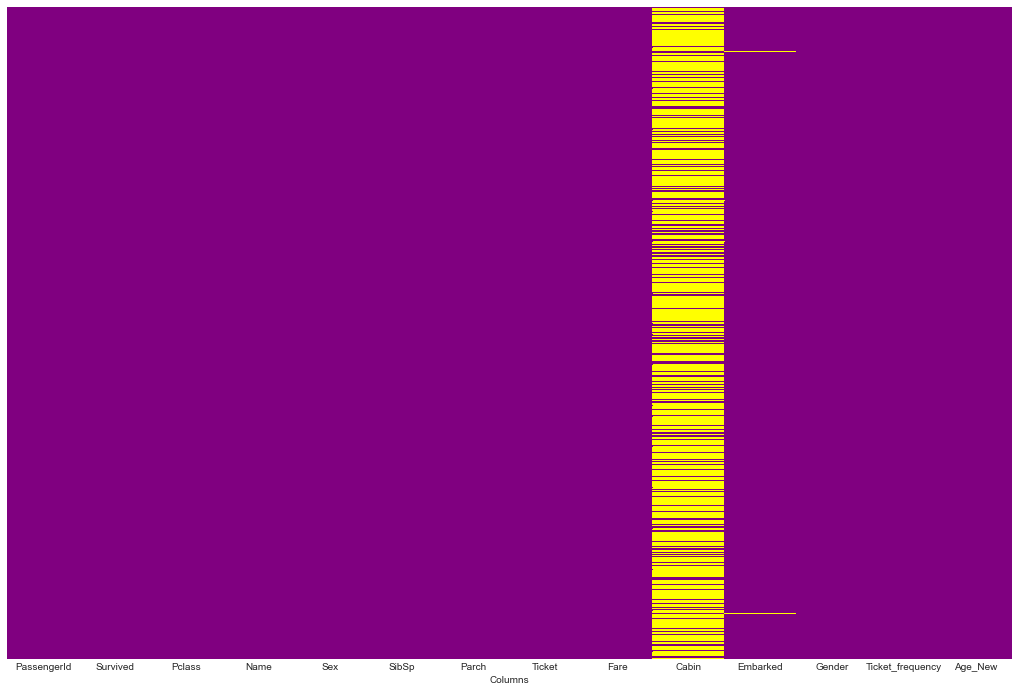

In [462]:
# plot the umputation 
missing_data_train = data_train.isnull()
plt.figure(figsize=(18,12))
sns.heatmap(missing_data_train.drop(columns=['Age',]), cbar=False, cmap=['purple', 'yellow'], yticklabels=False)
plt.xlabel('Columns')
plt.ylabel('')

## Drop the Cabin column and the row.****

In [463]:
# data_train.drop('Cabin', axis=1, inplace=True)
data_train.shape
# drop all the rows when the cabin is null
no_cabin  = data_train.dropna(subset=['Cabin'], )

no_cabin.drop('Cabin', axis=1, inplace=True)

In [464]:
# data_train.groupby('Embarked')['Survived'].agg(['mean',])

In [465]:
# code  - Drop the Cabin column and the row.
data_train['Age_New_1'] = data_train.apply(lambda x: impute_age(x), axis=1)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Ticket_frequency,Age_New,Age_New_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,35.0,35.0


## **Completing a categorical feature and fill the missing values in `Embarked` feature with the most common occurrences**

`Embarked` feature takes S, Q, C values based on port of embarkation. Our training dataset has some missing values. We simply fill these with the most common occurance.

In [466]:
# impute the missing values in the Embarked column with the mode value
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace=True)
# print(data_train['Embarked'].mode()[0])

In [467]:
# fill na on combined_Data of Embarked values 
combined_data['Embarked'].fillna(combined_data['Embarked'].mode()[0], inplace=True)
    
# on data_train  group by the 'Embarked', 'Survived' column and caclulate the mean of surviving 

data_train.groupby('Embarked')['Survived'].agg('mean')

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [468]:
# check if we have an null in the data_train on 'Embarked' values
data_train.Embarked.isnull().sum()

0

## **Completing and converting a numeric feature**

Please complete the `Fare` feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. 

<AxesSubplot:xlabel='Fare', ylabel='Count'>

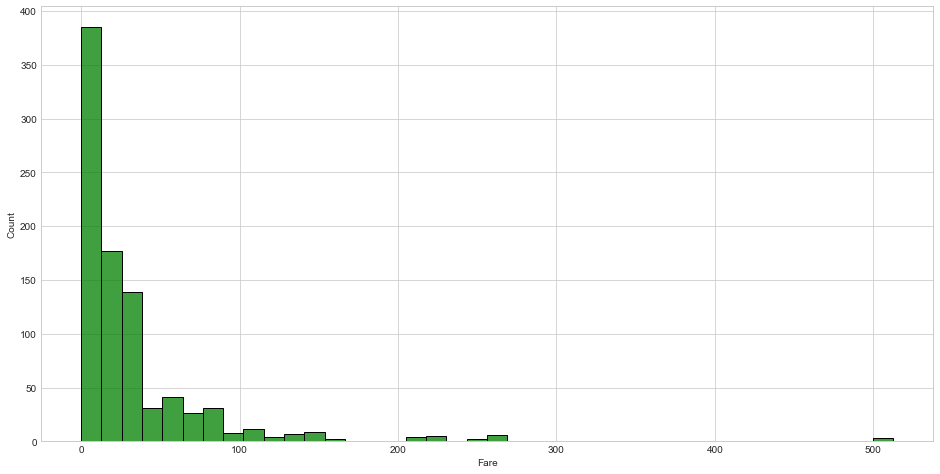

In [469]:
sns.histplot(data=data_train, x='Fare', bins=40, color='green')


In [470]:
# plot the Fare distribution, in bins - 40 using the mode 


In [471]:
data_train['Fare'].median()

14.4542

In [472]:
data_train['Fare'].fillna(data_train['Fare'].median(), inplace=True)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Ticket_frequency,Age_New,Age_New_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,35.0,35.0


In [473]:
# on one line code replace the missing values on Fare column by median



In [474]:
# code  that count number of missing values
data_train.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              0
Gender                0
Ticket_frequency      0
Age_New               0
Age_New_1             0
dtype: int64

## **Convert the `Fare` feature to ordinal values based on the FareBand**

In [475]:
# FireBand
# split the data to 4 equel pars one line code 
data_train['FareBand'] = pd.qcut(data_train['Fare'], 4)




# ggroup by and calculate the each part mean sort by pars 
data_train.groupby('FareBand')['Survived'].agg('mean').sort_values()





FareBand
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [476]:
data_train.loc[[0, 1]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Ticket_frequency,Age_New,Age_New_1,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,22.0,22.0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,38.0,38.0,"(31.0, 512.329]"


In [477]:
# Convert the Fare feature to ordinal values based on the FareBand  in the data frame


def changeFare(row):
    if row['Fare'] <= 7.91:
        return 0
    elif row['Fare'] <= 14.454:
        return 1
    elif row['Fare'] <= 31:
        return 2
    else:
        return 3
    
data_train['Fare'] = data_train.apply(lambda x: changeFare(x), axis=1)

# drop FareBand column 
data_train = data_train.drop(['FareBand'], axis=1)



data_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Ticket_frequency,Age_New,Age_New_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,0,1,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,C85,C,1,1,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,S,1,1,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,C123,S,1,2,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S,0,1,35.0,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,1,NaN,Q,0,1,28.0,24.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3,E46,S,0,1,54.0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,2,NaN,S,0,4,2.0,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,1,NaN,S,1,3,27.0,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,2,NaN,C,1,2,14.0,14.0


In [478]:
#  using groupby calculate the mean of each new Fare data 
data_train.groupby('Fare')['Survived'].agg('mean')

Fare
0    0.197309
1    0.308756
2    0.445415
3    0.581081
Name: Survived, dtype: float64

# **GOOD JOB :)**